In [1]:
import pandas as pd

dataset load

In [2]:
dataset=pd.read_csv('kidney_disease.csv')

In [3]:
dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


basic info about this dataset

In [4]:
dataset.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
dataset.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

dataet preprossing

In [7]:
numerical_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = dataset.select_dtypes(include=['object']).columns

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)


Numerical columns: Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo'],
      dtype='object')
Categorical columns: Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [8]:
import numpy as np
from sklearn.impute import SimpleImputer

numerical_imputer = SimpleImputer(strategy='mean')
dataset[numerical_cols] = numerical_imputer.fit_transform(dataset[numerical_cols])

categorical_imputer = SimpleImputer(strategy='most_frequent')
dataset[categorical_cols] = categorical_imputer.fit_transform(dataset[categorical_cols])


In [9]:
missing_values = dataset.isnull().sum()
print("Remaining missing values:", missing_values[missing_values > 0])


Remaining missing values: Series([], dtype: int64)


In [10]:
print("Data after imputation:")
print(dataset.head())


Data after imputation:
    id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  0.0  48.0  80.0  1.020  1.0  0.0  normal    normal  notpresent  notpresent   
1  1.0   7.0  50.0  1.020  4.0  0.0  normal    normal  notpresent  notpresent   
2  2.0  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  3.0  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  4.0  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  5.2   no   no   no  good   no   no            ckd  
2  ...   31  7500  5.2   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]


In [11]:
df=pd.DataFrame(dataset,columns=numerical_cols)

In [12]:
df

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
0,0.0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4
1,1.0,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3
2,2.0,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6
3,3.0,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2
4,4.0,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6
...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.0,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7
396,396.0,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5
397,397.0,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8
398,398.0,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,4.900000,14.2


In [13]:
cate=pd.DataFrame(dataset,columns=categorical_cols)

In [14]:
cate

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,38,6000,5.2,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,47,6700,4.9,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,54,7800,6.2,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,49,6600,5.4,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,51,7200,5.9,no,no,no,good,no,no,notckd


In [15]:
two=[df,cate]
preprocessed=pd.concat(two,axis=1)

In [16]:
preprocessed

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1.0,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3.0,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4.0,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.0,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396.0,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397.0,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398.0,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [17]:
dataset.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

univariate analysis

In [18]:
dataset['bp'].mean()

76.46907216494844

In [19]:
dataset['bp'].median()

78.23453608247422

In [20]:
dataset['bp'].mode()[0]

80.0

In [21]:
dataset.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,16.974966,13.476298,0.005369,1.272318,1.029487,74.782634,49.285887,5.617490,9.204273,2.819783,2.716171
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.015000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.875000
50%,199.500000,54.000000,78.234536,1.017408,1.000000,0.000000,126.000000,44.000000,1.400000,137.528754,4.627244,12.526437
75%,299.250000,64.000000,80.000000,1.020000,2.000000,0.450142,150.000000,61.750000,3.072454,141.000000,4.800000,14.625000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [22]:

# Assuming 'quan' is defined somewhere in your code
descriptive = pd.DataFrame(index=['mean','median','mode','Q1:25%','Q2:50%','Q3:75%','Q4:100%','IQR','1.5rule','lesser','greater','min','max'], columns=numerical_cols)

# Assuming 'dataset' is your DataFrame
for ColumnName in numerical_cols:
    descriptive.loc['mean', ColumnName] = dataset[ColumnName].mean()
    descriptive.loc['median', ColumnName] = dataset[ColumnName].median()
    descriptive.loc['mode', ColumnName] = dataset[ColumnName].mode()[0]
    descriptive.loc['Q1:25%', ColumnName] = dataset[ColumnName].quantile(0.25)
    descriptive.loc['Q2:50%', ColumnName] = dataset[ColumnName].quantile(0.50)
    descriptive.loc['Q3:75%', ColumnName] = dataset[ColumnName].quantile(0.75)
    descriptive.loc['99%', ColumnName] = np.percentile(dataset[ColumnName], 99)
    descriptive.loc['Q4:100%', ColumnName] = dataset[ColumnName].max()
    descriptive.loc['IQR', ColumnName] = descriptive.loc['Q3:75%', ColumnName] - descriptive.loc['Q1:25%', ColumnName]
    descriptive.loc['1.5rule', ColumnName] = 1.5 * descriptive.loc['IQR', ColumnName]
    descriptive.loc['lesser', ColumnName] = descriptive.loc['Q1:25%', ColumnName] - descriptive.loc['1.5rule', ColumnName]
    descriptive.loc['greater', ColumnName] = descriptive.loc['Q3:75%', ColumnName] + descriptive.loc['1.5rule', ColumnName]
    descriptive.loc['min', ColumnName] = dataset[ColumnName].min()
    descriptive.loc['max', ColumnName] = dataset[ColumnName].max()



In [23]:
descriptive

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
mean,199.5,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
median,199.5,54.0,78.234536,1.017408,1.0,0.0,126.0,44.0,1.4,137.528754,4.627244,12.526437
mode,0.0,60.0,80.0,1.02,0.0,0.0,148.036517,57.425722,1.2,137.528754,4.627244,12.526437
Q1:25%,99.75,42.0,70.0,1.015,0.0,0.0,101.0,27.0,0.9,135.0,4.0,10.875
Q2:50%,199.5,54.0,78.234536,1.017408,1.0,0.0,126.0,44.0,1.4,137.528754,4.627244,12.526437
Q3:75%,299.25,64.0,80.0,1.02,2.0,0.450142,150.0,61.75,3.072454,141.0,4.8,14.625
Q4:100%,399.0,90.0,180.0,1.025,5.0,5.0,490.0,391.0,76.0,163.0,47.0,17.8
IQR,199.5,22.0,10.0,0.005,2.0,0.450142,49.0,34.75,2.172454,6.0,0.8,3.75
1.5rule,299.25,33.0,15.0,0.0075,3.0,0.675214,73.5,52.125,3.258681,9.0,1.2,5.625
lesser,-199.5,9.0,55.0,1.0075,-3.0,-0.675214,27.5,-25.125,-2.358681,126.0,2.8,5.25


In [29]:
lesser=[]
greater=[]

for columnName in numerical_cols:
    if(descriptive[columnName]["min"]<descriptive[columnName]["lesser"]):
        lesser.append(columnName)
    if(descriptive[columnName] ["max"]>descriptive[columnName]["greater"]):
        greater.append(columnName)

In [30]:
lesser

['age', 'bp', 'sg', 'bgr', 'sod', 'pot', 'hemo']

In [31]:
greater

['bp', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot']

In [32]:
def find_outliers(numerical_cols):
    lesser = []
    greater = []
    
    for columnName in numerical_cols:
        if descriptive[columnName]["min"] < descriptive[columnName]["lesser"]:
            lesser.append(columnName)
        if descriptive[columnName]["max"] > descriptive[columnName]["greater"]:
            greater.append(columnName)
    
    return lesser, greater

In [33]:
find_outliers(numerical_cols)

(['age', 'bp', 'sg', 'bgr', 'sod', 'pot', 'hemo'],
 ['bp', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot'])

In [34]:
for columnName in lesser:
    dataset[columnName][dataset[columnName]<descriptive[columnName]["lesser"]]=descriptive[columnName]["lesser"]
for columnName in greater:
    dataset[columnName][dataset[columnName]>descriptive[columnName]["greater"]]=descriptive[columnName]["greater"]

C:\Users\saran\AppData\Local\Temp\ipykernel_26816\494802273.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataset[columnName][dataset[columnName]<descriptive[columnName]["lesser"]]=descriptive[columnName]["lesser"]
C:\Users\saran\AppDa

In [35]:
# Assuming 'quan' is defined somewhere in your code
descriptive = pd.DataFrame(index=['mean','median','mode','Q1:25%','Q2:50%','Q3:75%','Q4:100%','IQR','1.5rule','lesser','greater','min','max'], columns=numerical_cols)

# Assuming 'dataset' is your DataFrame
for ColumnName in numerical_cols:
    descriptive.loc['mean', ColumnName] = dataset[ColumnName].mean()
    descriptive.loc['median', ColumnName] = dataset[ColumnName].median()
    descriptive.loc['mode', ColumnName] = dataset[ColumnName].mode()[0]
    descriptive.loc['Q1:25%', ColumnName] = dataset[ColumnName].quantile(0.25)
    descriptive.loc['Q2:50%', ColumnName] = dataset[ColumnName].quantile(0.50)
    descriptive.loc['Q3:75%', ColumnName] = dataset[ColumnName].quantile(0.75)
    descriptive.loc['99%', ColumnName] = np.percentile(dataset[ColumnName], 99)
    descriptive.loc['Q4:100%', ColumnName] = dataset[ColumnName].max()
    descriptive.loc['IQR', ColumnName] = descriptive.loc['Q3:75%', ColumnName] - descriptive.loc['Q1:25%', ColumnName]
    descriptive.loc['1.5rule', ColumnName] = 1.5 * descriptive.loc['IQR', ColumnName]
    descriptive.loc['lesser', ColumnName] = descriptive.loc['Q1:25%', ColumnName] - descriptive.loc['1.5rule', ColumnName]
    descriptive.loc['greater', ColumnName] = descriptive.loc['Q3:75%', ColumnName] + descriptive.loc['1.5rule', ColumnName]
    descriptive.loc['min', ColumnName] = dataset[ColumnName].min()
    descriptive.loc['max', ColumnName] = dataset[ColumnName].max()


In [36]:
descriptive

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
mean,199.5,51.568376,75.719072,1.017452,1.016949,0.222685,136.985267,51.010409,2.254129,138.115004,4.432744,12.532937
median,199.5,54.0,78.234536,1.017408,1.0,0.0,126.0,44.0,1.4,137.528754,4.627244,12.526437
mode,0.0,60.0,80.0,1.02,0.0,0.0,223.5,113.875,6.331136,137.528754,4.627244,12.526437
Q1:25%,99.75,42.0,70.0,1.015,0.0,0.0,101.0,27.0,0.9,135.0,4.0,10.875
Q2:50%,199.5,54.0,78.234536,1.017408,1.0,0.0,126.0,44.0,1.4,137.528754,4.627244,12.526437
Q3:75%,299.25,64.0,80.0,1.02,2.0,0.450142,150.0,61.75,3.072454,141.0,4.8,14.625
Q4:100%,399.0,90.0,95.0,1.025,5.0,1.125356,223.5,113.875,6.331136,150.0,6.0,17.8
IQR,199.5,22.0,10.0,0.005,2.0,0.450142,49.0,34.75,2.172454,6.0,0.8,3.75
1.5rule,299.25,33.0,15.0,0.0075,3.0,0.675214,73.5,52.125,3.258681,9.0,1.2,5.625
lesser,-199.5,9.0,55.0,1.0075,-3.0,-0.675214,27.5,-25.125,-2.358681,126.0,2.8,5.25


In [39]:
dataset['bp'].value_counts()

bp
80.000000    116
70.000000    112
60.000000     71
90.000000     53
95.000000     31
76.469072     12
55.000000      5
Name: count, dtype: int64

In [40]:
def freqTable(columnName,dataset):
    freqTable=pd.DataFrame(columns=['unique_values','frequency','Relative frequency','cusum'])
    freqTable['unique_values']=dataset[columnName].value_counts().index
    freqTable['frequency']=dataset[columnName].value_counts().values
    freqTable['Relative frequency']=(freqTable['frequency']/103)
    freqTable['cusum']=freqTable['Relative frequency'].cumsum()
    return freqTable

In [42]:
freqTable('bp',dataset)

,unique_values,frequency,Relative frequency,cusum
0,80.000000,116,1.126214,1.126214
1,70.000000,112,1.087379,2.213592
2,60.000000,71,0.689320,2.902913
3,90.000000,53,0.514563,3.417476
4,95.000000,31,0.300971,3.718447
5,76.469072,12,0.116505,3.834951
6,55.000000,5,0.048544,3.883495


In [43]:
def find_outliers(numerical_cols):
    lesser = []
    greater = []
    
    for columnName in numerical_cols:
        if descriptive[columnName]["min"] < descriptive[columnName]["lesser"]:
            lesser_outliers.append(columnName)
        if descriptive[columnName]["max"] > descriptive[columnName]["greater"]:
            greater_outliers.append(columnName)
    
    return lesser, greater


In [45]:
find_outliers(numerical_cols)

([], [])

In [46]:
def replace_outliers(numerical_cols):
    lesser = []
    greater = []
    
    for columnName in numerical_cols:
        if descriptive[columnName]["min"] < descriptive[columnName]["lesser"]:
            lesser_outliers.append(columnName)
        if descriptive[columnName]["max"] > descriptive[columnName]["greater"]:
            greater_outliers.append(columnName)
    
    for columnName in lesser:
        dataset[columnName][dataset[columnName] < descriptive[columnName]["lesser"]] = descriptive[columnName]["lesser"]
    
    for columnName in greater:
        dataset[columnName][dataset[columnName] > descriptive[columnName]["greater"]] = descriptive[columnName]["greater"]
   
    return lesser,greater


In [47]:
 replace_outliers(numerical_cols)

([], [])

In [48]:
def Univariate(dataset,numerical_cols):
    descriptive = pd.DataFrame(index=['mean','median','mode','Q1:25%','Q2:50%','Q3:75%','Q4:100%','IQR','1.5rule',
                                      'lesser','greater','min','max','skew','kurtosis'], columns=numerical_cols)

    for ColumnName in numerical_cols:
        descriptive.loc['mean', ColumnName] = dataset[ColumnName].mean()
        descriptive.loc['median', ColumnName] = dataset[ColumnName].median()
        descriptive.loc['mode', ColumnName] = dataset[ColumnName].mode()[0]
        descriptive.loc['Q1:25%', ColumnName] = dataset[ColumnName].quantile(0.25)
        descriptive.loc['Q2:50%', ColumnName] = dataset[ColumnName].quantile(0.50)
        descriptive.loc['Q3:75%', ColumnName] = dataset[ColumnName].quantile(0.75)
        descriptive.loc['99%', ColumnName] = np.percentile(dataset[ColumnName], 99)
        descriptive.loc['Q4:100%', ColumnName] = dataset[ColumnName].max()
        descriptive.loc['IQR', ColumnName] = descriptive.loc['Q3:75%', ColumnName] - descriptive.loc['Q1:25%', ColumnName]
        descriptive.loc['1.5rule', ColumnName] = 1.5 * descriptive.loc['IQR', ColumnName]
        descriptive.loc['lesser', ColumnName] = descriptive.loc['Q1:25%', ColumnName] - descriptive.loc['1.5rule', ColumnName]
        descriptive.loc['greater', ColumnName] = descriptive.loc['Q3:75%', ColumnName] + descriptive.loc['1.5rule', ColumnName]
        descriptive.loc['min', ColumnName] = dataset[ColumnName].min()
        descriptive.loc['max', ColumnName] = dataset[ColumnName].max()
        descriptive.loc['skew', ColumnName]=dataset[ColumnName].skew()
        descriptive.loc['kurtosis', ColumnName]=dataset[ColumnName].kurtosis()
        descriptive.loc['var', ColumnName]=dataset[ColumnName].var()
        descriptive.loc['std', ColumnName]=dataset[ColumnName].std()

    return descriptive

In [49]:
Univariate(dataset,numerical_cols)

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
mean,199.5,51.568376,75.719072,1.017452,1.016949,0.222685,136.985267,51.010409,2.254129,138.115004,4.432744,12.532937
median,199.5,54.0,78.234536,1.017408,1.0,0.0,126.0,44.0,1.4,137.528754,4.627244,12.526437
mode,0.0,60.0,80.0,1.02,0.0,0.0,223.5,113.875,6.331136,137.528754,4.627244,12.526437
Q1:25%,99.75,42.0,70.0,1.015,0.0,0.0,101.0,27.0,0.9,135.0,4.0,10.875
Q2:50%,199.5,54.0,78.234536,1.017408,1.0,0.0,126.0,44.0,1.4,137.528754,4.627244,12.526437
Q3:75%,299.25,64.0,80.0,1.02,2.0,0.450142,150.0,61.75,3.072454,141.0,4.8,14.625
Q4:100%,399.0,90.0,95.0,1.025,5.0,1.125356,223.5,113.875,6.331136,150.0,6.0,17.8
IQR,199.5,22.0,10.0,0.005,2.0,0.450142,49.0,34.75,2.172454,6.0,0.8,3.75
1.5rule,299.25,33.0,15.0,0.0075,3.0,0.675214,73.5,52.125,3.258681,9.0,1.2,5.625
lesser,-199.5,9.0,55.0,1.0075,-3.0,-0.675214,27.5,-25.125,-2.358681,126.0,2.8,5.25


In [51]:
import seaborn as sns

C:\Users\saran\AppData\Local\Temp\ipykernel_26816\2315757352.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['bp'])


<Axes: xlabel='bp', ylabel='Density'>

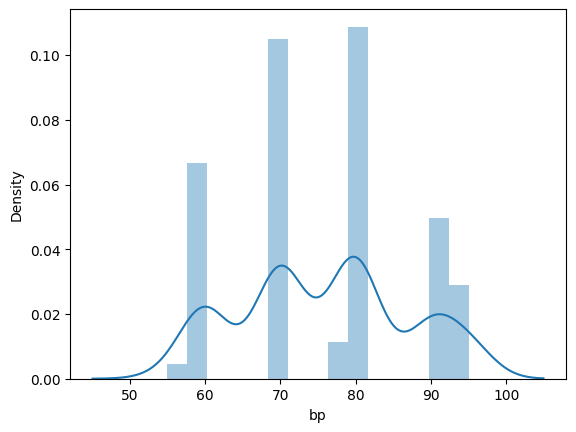

In [52]:
sns.distplot(dataset['bp'])

In [53]:
def get_pdf_probability (dataset, startrange, endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset, kde=True, kde_kws={'color': 'blue'},color='Green')
    pyplot.axvline (startrange, color='Red')
    pyplot.axvline (endrange,color='Red')
    
    # generate a sample
    sample = dataset
    
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    
    # define the distribution
    dist =norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf (value) for value in values]
    prob=sum(probabilities)
    print("The area between range({},{}): {}".format(startrange, endrange, sum (probabilities)))
    return prob

Mean=75.719, Standard Deviation=10.947
The area between range(70,80): 0.3502145893975321


C:\Users\saran\AppData\Local\Temp\ipykernel_26816\1776784170.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset, kde=True, kde_kws={'color': 'blue'},color='Green')


0.3502145893975321

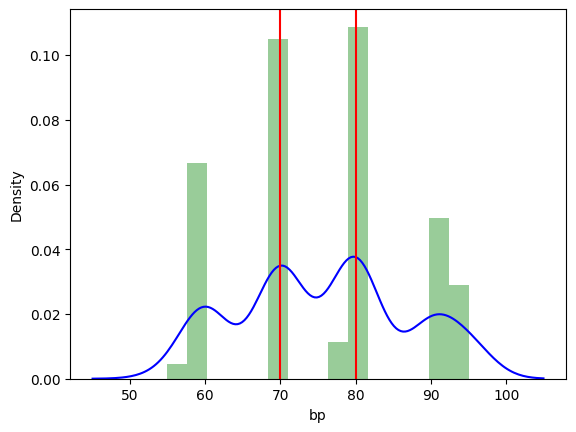

In [55]:
get_pdf_probability (dataset['bp'],70,80 )

In [61]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset['bp'])
ecdf(80)

0.7899999999999999

In [62]:
def standardNDgraph(dataset):
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]
    z_score=[((j-mean)/std) for j in values]

    sns.distplot(z_score,kde=True)

    sum(z_score)/len(z_score)

C:\Users\saran\AppData\Local\Temp\ipykernel_26816\861724717.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde=True)


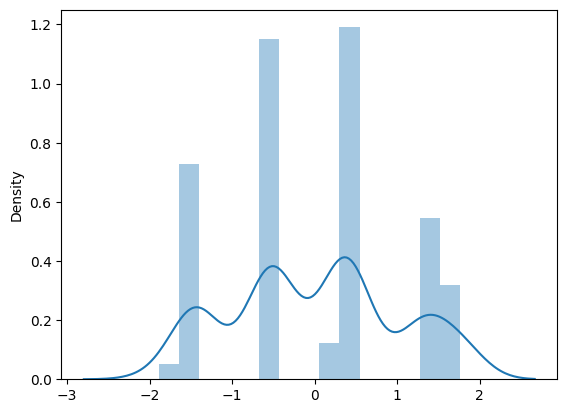

In [63]:
standardNDgraph(dataset['bp'])